# Recursive Feature Elimination with tree based methods

In this Notebook various methods utilizing ensembles of decision trees are utilized to select most informative features. All these methods construct ensemble of trees in a different manner. These methods are Random Forests, Extremely Randomized Trees, Gradient Boosting and Adaptive Boosting ensemble methods utilizing Decision Trees.

## Importing the necessary libraries


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pylab 
import scipy.stats as stats
import time
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.svm import LinearSVC

from sklearn.feature_selection import RFE

from sklearn.datasets import make_moons, make_circles, make_classification

import collections

import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second

## Producing the Synthetic Data
In this example, total number of features are 100 and only 2 of them are useful and 20 of them are redundant. There are three classes and 71 samples. 

In [2]:
X, y = make_classification(n_samples=71, n_classes=3, n_features=100, n_redundant=0, n_informative=3, n_clusters_per_class=1, shuffle=False,random_state=78)

## Number of Selected Features
In below, we determine the number of features selected recursively by Recursive Feature Elimination (RFE) method. In this example, we choose it to be 1, namely the most informative feature. 

In [3]:
#Change number of selected features
number_of_selected_features = 1

## Missing Values
These classes are defined for handling missing data. In this synthetic data there is no missing values but if your dataset includes missing values,
first you should use missing data imputation methods in order to utilize the methods executed here.

In [4]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy='median')
imputer2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

## Defining Feature Selection Algorithms
Here the algorithms utilizied in Recursive Feature Elimination Method (RFE) are defined. In this example, number of base learners are 100 for all the methods. They all utilize randomness in a different way in order to train subsamples with subspaces of feature set utilizing decision tree subsamples.



In [5]:
#Feature Selection Algorithms
fs1 = RFE(RandomForestClassifier(n_estimators=100), n_features_to_select=number_of_selected_features, verbose=0)
fs2 = RFE(ExtraTreesClassifier(n_estimators=100, bootstrap=True), n_features_to_select=number_of_selected_features, verbose=0)
fs3 = RFE(GradientBoostingClassifier(n_estimators=100, max_features='auto', subsample=0.7), n_features_to_select=number_of_selected_features, verbose=0)
fs4 = RFE(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100), n_features_to_select=number_of_selected_features, verbose=0)
#Add more feature selection options





## Constructing Pipelines
Pipelines are very useful, especially when cross validation will be performed. Because this allows different operations such as missing value imputation, normalization and classification model construction to be performed in a proper way. In this case there is no cross validation procedure but we use pipelines here to easily construct procedures we want.     

In [6]:
#Pipelines

pipe1 = Pipeline([('imputer', imputer1),
                 ('fs', fs1)])

pipe2 = Pipeline([('imputer', imputer2), 
                 ('fs', fs1)])


pipe3 = Pipeline([('imputer', imputer1),
                 ('fs', fs2)])


pipe4 = Pipeline([('imputer', imputer2),
                 ('fs', fs2)])


pipe5 = Pipeline([('imputer', imputer1),
                 ('fs', fs3)])


pipe6 = Pipeline([('imputer', imputer2),
                 ('fs', fs3)])



pipe7 = Pipeline([('imputer', imputer1),
                 ('fs', fs4)])


pipe8 = Pipeline([('imputer', imputer2),
                 ('fs', fs4)])

#Add more pipelines



## Determining Which Pipelines will Be Executed
Here you can include or exclude defined pipelines in a flexible way. If you define more pipelines, do not forget to include your pipelines in pipelist.  

In [7]:
pipelist = [pipe1, pipe2, pipe3, pipe4, pipe5, pipe6, pipe7, pipe8] #Include your pipelines in this list

## Estimating The Computation Time
Here, all the pipelines are executed once in order to approximately calculate the total time neccessary for running the code in the next cell. Each pipeline will be executed number_of_iteration times with randomly selected subsamples. 

In [8]:
number_of_iteration = 100

In [9]:
start = time.time()
for pipe in pipelist:
    pipe = pipe.fit(X, y)
    training_pred = pipe.predict(X)

end = time.time()
print('Computation Time:',end - start)


Estimated_Time = ((end - start)*number_of_iteration)
print('Estimated Time:',Estimated_Time/60,'min','or',Estimated_Time/3600,'h')


Computation Time: 115.41306376457214
Estimated Time: 192.3551062742869 min or 3.205918437904782 h


In [10]:
start = time.time()
print('Program start to run at',time.localtime())
counter_collections=collections.Counter()

for pipe in pipelist:
    
    
    selectedfeatures=[]
    
    
    for i in range(number_of_iteration):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


        # run pipeline
        pipe = pipe.fit(X_train, y_train)
        selectedfeatures.append(tuple(pipe.steps[1][1].get_support(indices=True)))          #for RF-RFE




    counter=collections.Counter(selectedfeatures)
    counter_collections = counter_collections + counter
    
    print('Most Common Selected Features:',np.array(counter.most_common))    #change according to number of selected features


print('Total Selected Features in all methods:',np.array(counter_collections.most_common))

end = time.time()
print('Computation Time:',(end - start)/60,'min')
winsound.Beep(frequency, duration)

Program start to run at time.struct_time(tm_year=2019, tm_mon=4, tm_mday=15, tm_hour=11, tm_min=7, tm_sec=11, tm_wday=0, tm_yday=105, tm_isdst=1)
Most Common Selected Features: <bound method Counter.most_common of Counter({(0,): 51, (1,): 25, (2,): 24})>
Most Common Selected Features: <bound method Counter.most_common of Counter({(0,): 58, (1,): 30, (2,): 12})>
Most Common Selected Features: <bound method Counter.most_common of Counter({(0,): 72, (1,): 22, (2,): 6})>
Most Common Selected Features: <bound method Counter.most_common of Counter({(0,): 65, (1,): 27, (2,): 8})>
Most Common Selected Features: <bound method Counter.most_common of Counter({(0,): 65, (2,): 22, (1,): 13})>
Most Common Selected Features: <bound method Counter.most_common of Counter({(0,): 70, (2,): 17, (1,): 13})>
Most Common Selected Features: <bound method Counter.most_common of Counter({(2,): 50, (0,): 38, (1,): 12})>
Most Common Selected Features: <bound method Counter.most_common of Counter({(0,): 44, (2,): 

In [11]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [12]:
features = X.iloc[:,[0,2,1]]

## Visualization

### Visualize selected features with response variable in scatter plot by inserting index value of it

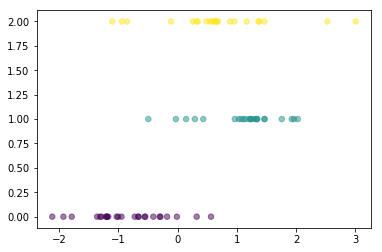

In [13]:
plt.scatter(X.iloc[:,[0]], y, s=30, c=y, alpha=0.5)
plt.show()

### Visualize selected features in scatter plot by inserting index values of them

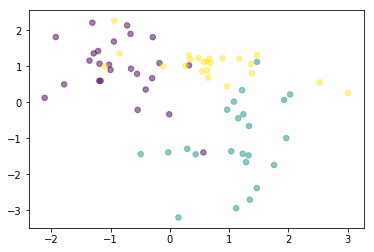

In [14]:
plt.scatter(X.iloc[:,[0]], X.iloc[:,[1]], s=30, c=y, alpha=0.5)
plt.show()

### Visualizing Correlation of the selected features

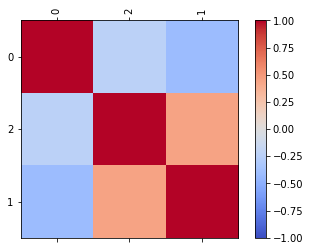

In [15]:
data = features
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [16]:
corr

,0,2,1
0,1.000000,-0.234048,-0.412248
2,-0.234048,1.000000,0.446707
1,-0.412248,0.446707,1.000000
